In [1]:
import pandas as pd
import numpy as np
import datapungi_fed as dpf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Download Data from FED API

In [4]:
bit = dpf('CBBTCUSD')

In [5]:
bit.head()

,CBBTCUSD
date,
2014-12-01,370.0
2014-12-02,378.0
2014-12-03,378.0
2014-12-04,377.1
2014-12-06,378.0


In [10]:
# the data covers 2012 to current day and daily unjusted prices
bit.index.min(), bit.index.max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2020-05-02 00:00:00'))

Units:  U.S. Dollars, Not Seasonally Adjusted

Frequency:  Daily, 7-Day

All data is as of 5 PM PST.

Copyright, 2018, Coinbase.

Reproduction of Coinbase data in any form is prohibited except with the prior written permission of Coinbase.
Suggested Citation:

Coinbase, Coinbase Bitcoin [CBBTCUSD], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CBBTCUSD, May 2, 2020.


In [3]:
# bit is a one column data frame
type(bit), bit.shape

(pandas.core.frame.DataFrame, (1946, 1))

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 <a list of 7 Text xticklabel objects>)

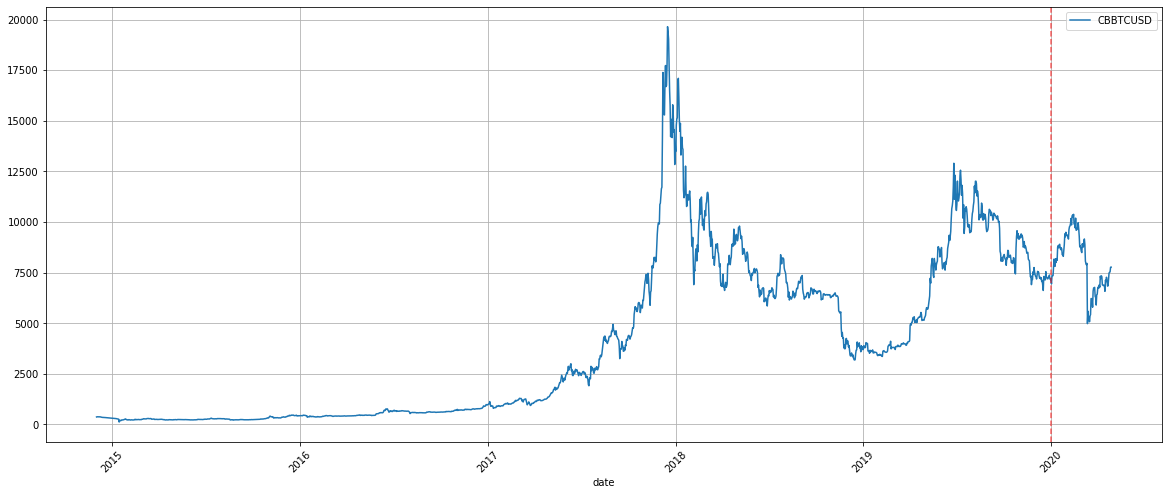

In [45]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = bit)
plt.grid()
plt.axvline('2020-1', alpha = 0.6, linestyle = '--', color = 'r')
plt.xticks(rotation=45)

# The Bitcoin Price USD with other Economic Indicators

## Monthly US Umemployment

In [11]:
# monthly unemployment rate
unrate = dpf('UNRATE')

In [13]:
unrate = unrate.loc['2014-12-01':]

In [14]:
unrate.head()

,UNRATE
date,
2014-12-01,5.6
2015-01-01,5.7
2015-02-01,5.5
2015-03-01,5.4
2015-04-01,5.4


In [18]:
bit_monthly = bit.resample('M').mean()

In [19]:
bit_monthly.head()

,CBBTCUSD
date,
2014-12-31,367.400000
2015-01-31,228.332105
2015-02-28,234.995000
2015-03-31,270.121613
2015-04-30,236.218333


In [21]:
unrate.shape, bit_monthly.shape

((64, 1), (66, 1))

In [22]:
unrate.index.min(), unrate.index.max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2020-03-01 00:00:00'))

In [23]:
bit_monthly.index.min(), bit_monthly.index.max()

(Timestamp('2014-12-31 00:00:00'), Timestamp('2020-05-31 00:00:00'))

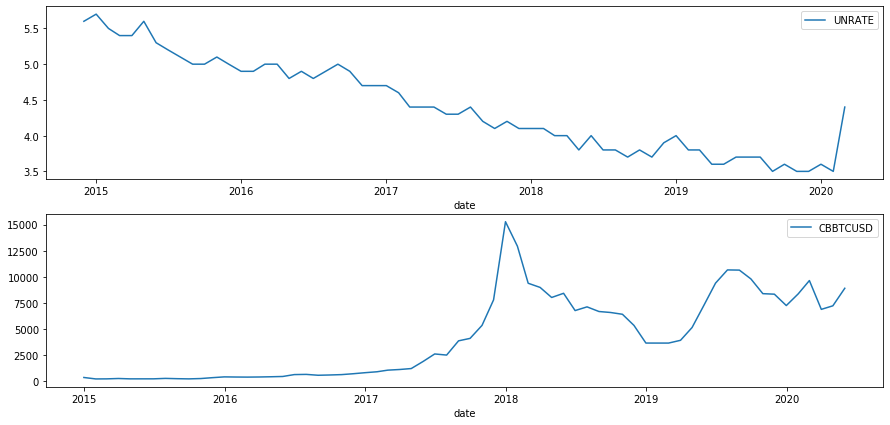

In [31]:
plt.figure(figsize = (15, 7))
plt.subplot(211)
sns.lineplot(data = unrate)
plt.subplot(212)
sns.lineplot(data = bit_monthly)

## NASDAQ and SP500

In [32]:
na = dpf('NASDAQCOM')

In [36]:
na.head()

,NASDAQCOM
date,
2014-12-01,4727.35
2014-12-02,4755.81
2014-12-03,4774.47
2014-12-04,4769.44
2014-12-05,4780.76


In [34]:
na = na.loc['2014-12-01':]

In [37]:
na.index.min(), na.index.max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2020-05-01 00:00:00'))

In [39]:
sp = dpf('SP500')

In [40]:
sp = sp.loc['2014-12-01':]

In [41]:
na.shape, bit.shape, sp.shape

((1365, 1), (1946, 1), (1364, 1))

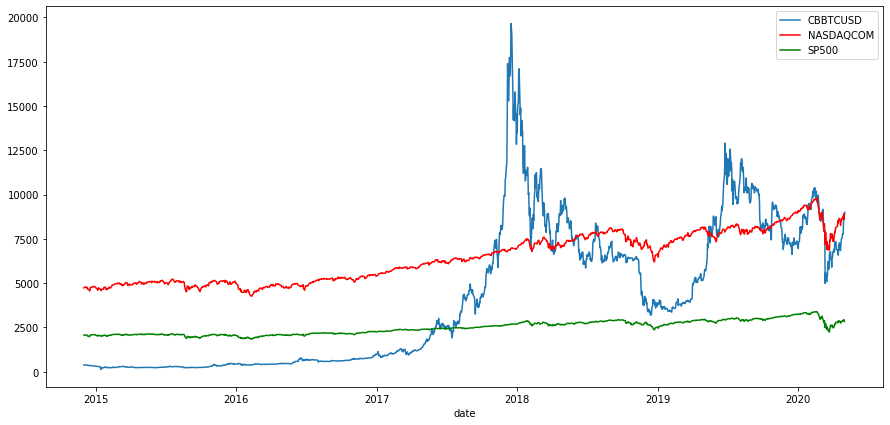

In [50]:
plt.figure(figsize = (15, 7))
sns.lineplot(data = bit)
sns.lineplot(data = na, palette=['red'])
sns.lineplot(data = sp, palette=['green'])


We can get the idea that although these three indexes are very different in terms of magtitude, there re a match in the peaks and valleys. 